In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [26]:
global_temp = pd.read_csv('GlobalTemperatures.csv')
temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
temp_by_major_city = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [27]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [29]:
temp_by_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [30]:
print(f'Global Temperature dataset: \n{global_temp.isnull().sum()}')
print(f'\nTemperature by country dataset: \n{temp_by_country.isnull().sum()}')
print(f'\nTemperature by major city dataset: \n{temp_by_major_city.isnull().sum()}')

Global Temperature dataset: 
dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

Temperature by country dataset: 
dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

Temperature by major city dataset: 
dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                         

In [31]:
#We start by global temperatures dataset. We will replace Nan values by mean or mode values
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [32]:
global_temp['LandAverageTemperature'].fillna(global_temp['LandAverageTemperature'].mean(), inplace=True)
global_temp['LandAverageTemperatureUncertainty'].fillna(global_temp['LandAverageTemperatureUncertainty'].mean(), inplace=True)
global_temp['LandMaxTemperature'].fillna(global_temp['LandMaxTemperature'].mean(), inplace=True)
global_temp['LandMaxTemperatureUncertainty'].fillna(global_temp['LandMaxTemperatureUncertainty'].mean(), inplace=True)
global_temp['LandMinTemperature'].fillna(global_temp['LandMinTemperature'].mean(), inplace=True)
global_temp['LandMinTemperatureUncertainty'].fillna(global_temp['LandMinTemperatureUncertainty'].mean(), inplace=True)
global_temp['LandAndOceanAverageTemperature'].fillna(global_temp['LandAndOceanAverageTemperature'].mean(), inplace=True)
global_temp['LandAndOceanAverageTemperatureUncertainty'].fillna(global_temp['LandAndOceanAverageTemperatureUncertainty'].mean(), inplace=True)
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1,1750-02-01,3.083,3.702,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
2,1750-03-01,5.626,3.076,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
3,1750-04-01,8.490,2.451,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
4,1750-05-01,11.573,2.072,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532


In [33]:
#We work on other dataset
temp_by_country = temp_by_country.interpolate()
temp_by_country.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [34]:
#we clean the last dataset
temp_by_major_city = temp_by_major_city.interpolate()
temp_by_major_city.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

### After that cleaning, we visualize our data

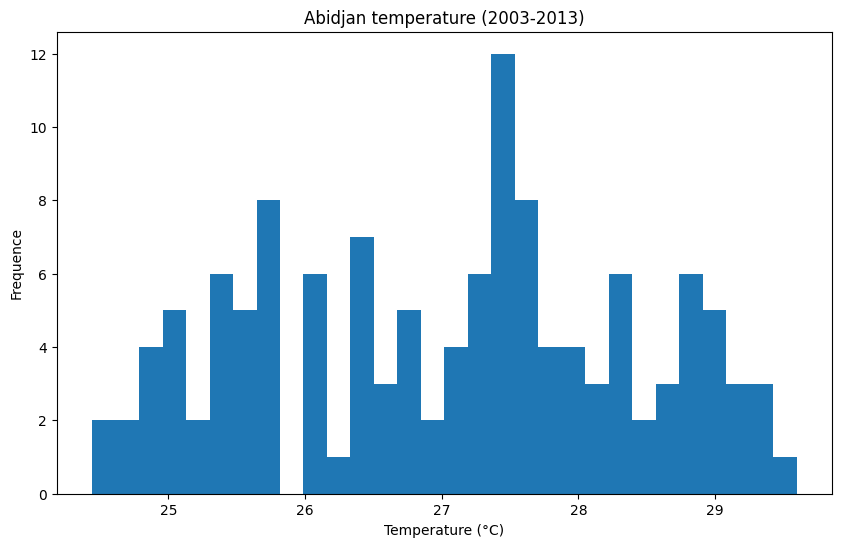

In [35]:
#We want to know the evolution of temperature in Abidjan city between 2013-09-01 and 2003-01-01
#first we filtered data
abidjan_data = temp_by_major_city[(temp_by_major_city['City'] == "Abidjan") &
                                  (pd.to_datetime(temp_by_major_city['dt'])>= '2003-01-01') &
                                  (pd.to_datetime(temp_by_major_city['dt'])< '2013-09-01')]
#histogram
plt.figure(figsize=(10, 6))
plt.hist(abidjan_data['AverageTemperature'], bins=30)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequence')
plt.title('Abidjan temperature (2003-2013)')
plt.show()

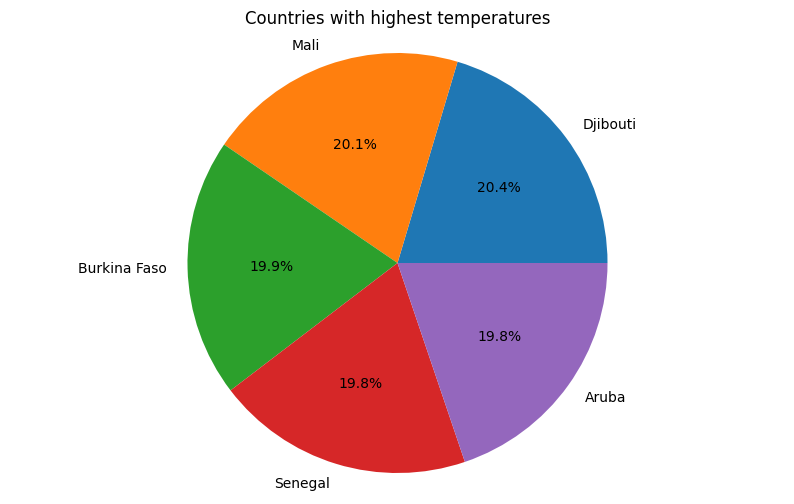

In [36]:
#We want to know countries which have the hoghest temperatures and see result in circular diagram
#We calculate mean temperature for each country
country_temp = temp_by_country.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False)

#We select five countries with highest temperatures
top_countries = country_temp.head(5).index

#We create diagram
plt.figure(figsize=(10, 6))
plt.pie(country_temp[top_countries], labels=top_countries, autopct='%1.1f%%')
plt.title('Countries with highest temperatures')
plt.axis('equal') #we want to obtain perfect circle
plt.show()

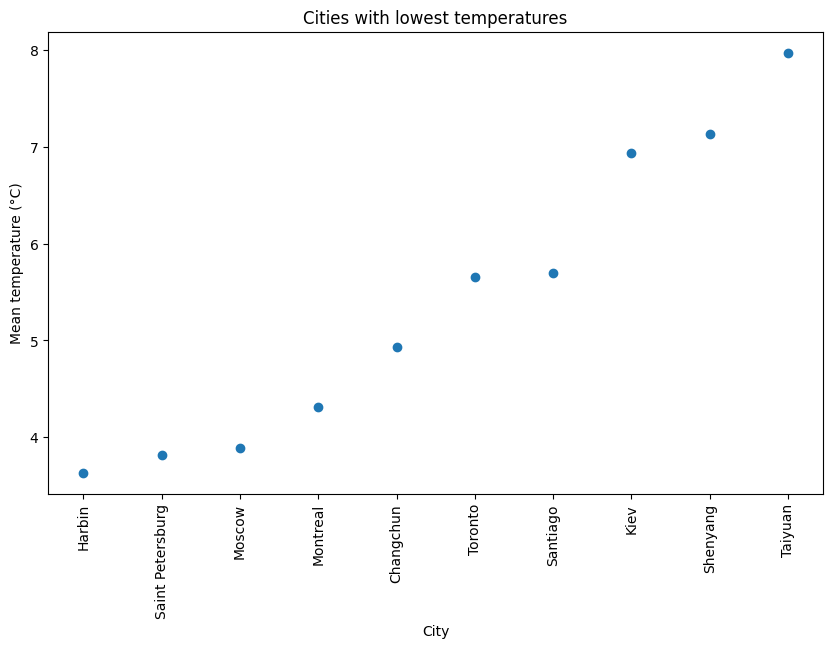

In [37]:
#We want to know cities with the lowest temperatures
city_temp = temp_by_major_city.groupby('City')['AverageTemperature'].mean().sort_values(ascending=True)

#We select five countries with lowest temperatures
top_countries = city_temp.head(10).index

#We create
plt.figure(figsize=(10, 6))
plt.scatter(range(len(top_countries)), city_temp[top_countries])
plt.xticks(range(len(top_countries)), top_countries, rotation=90)
plt.xlabel('City')
plt.ylabel('Mean temperature (°C)')
plt.title('Cities with lowest temperatures')
plt.show()

In [38]:
#We should convert values into right one for have correlation matrix
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [39]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
dtype: object

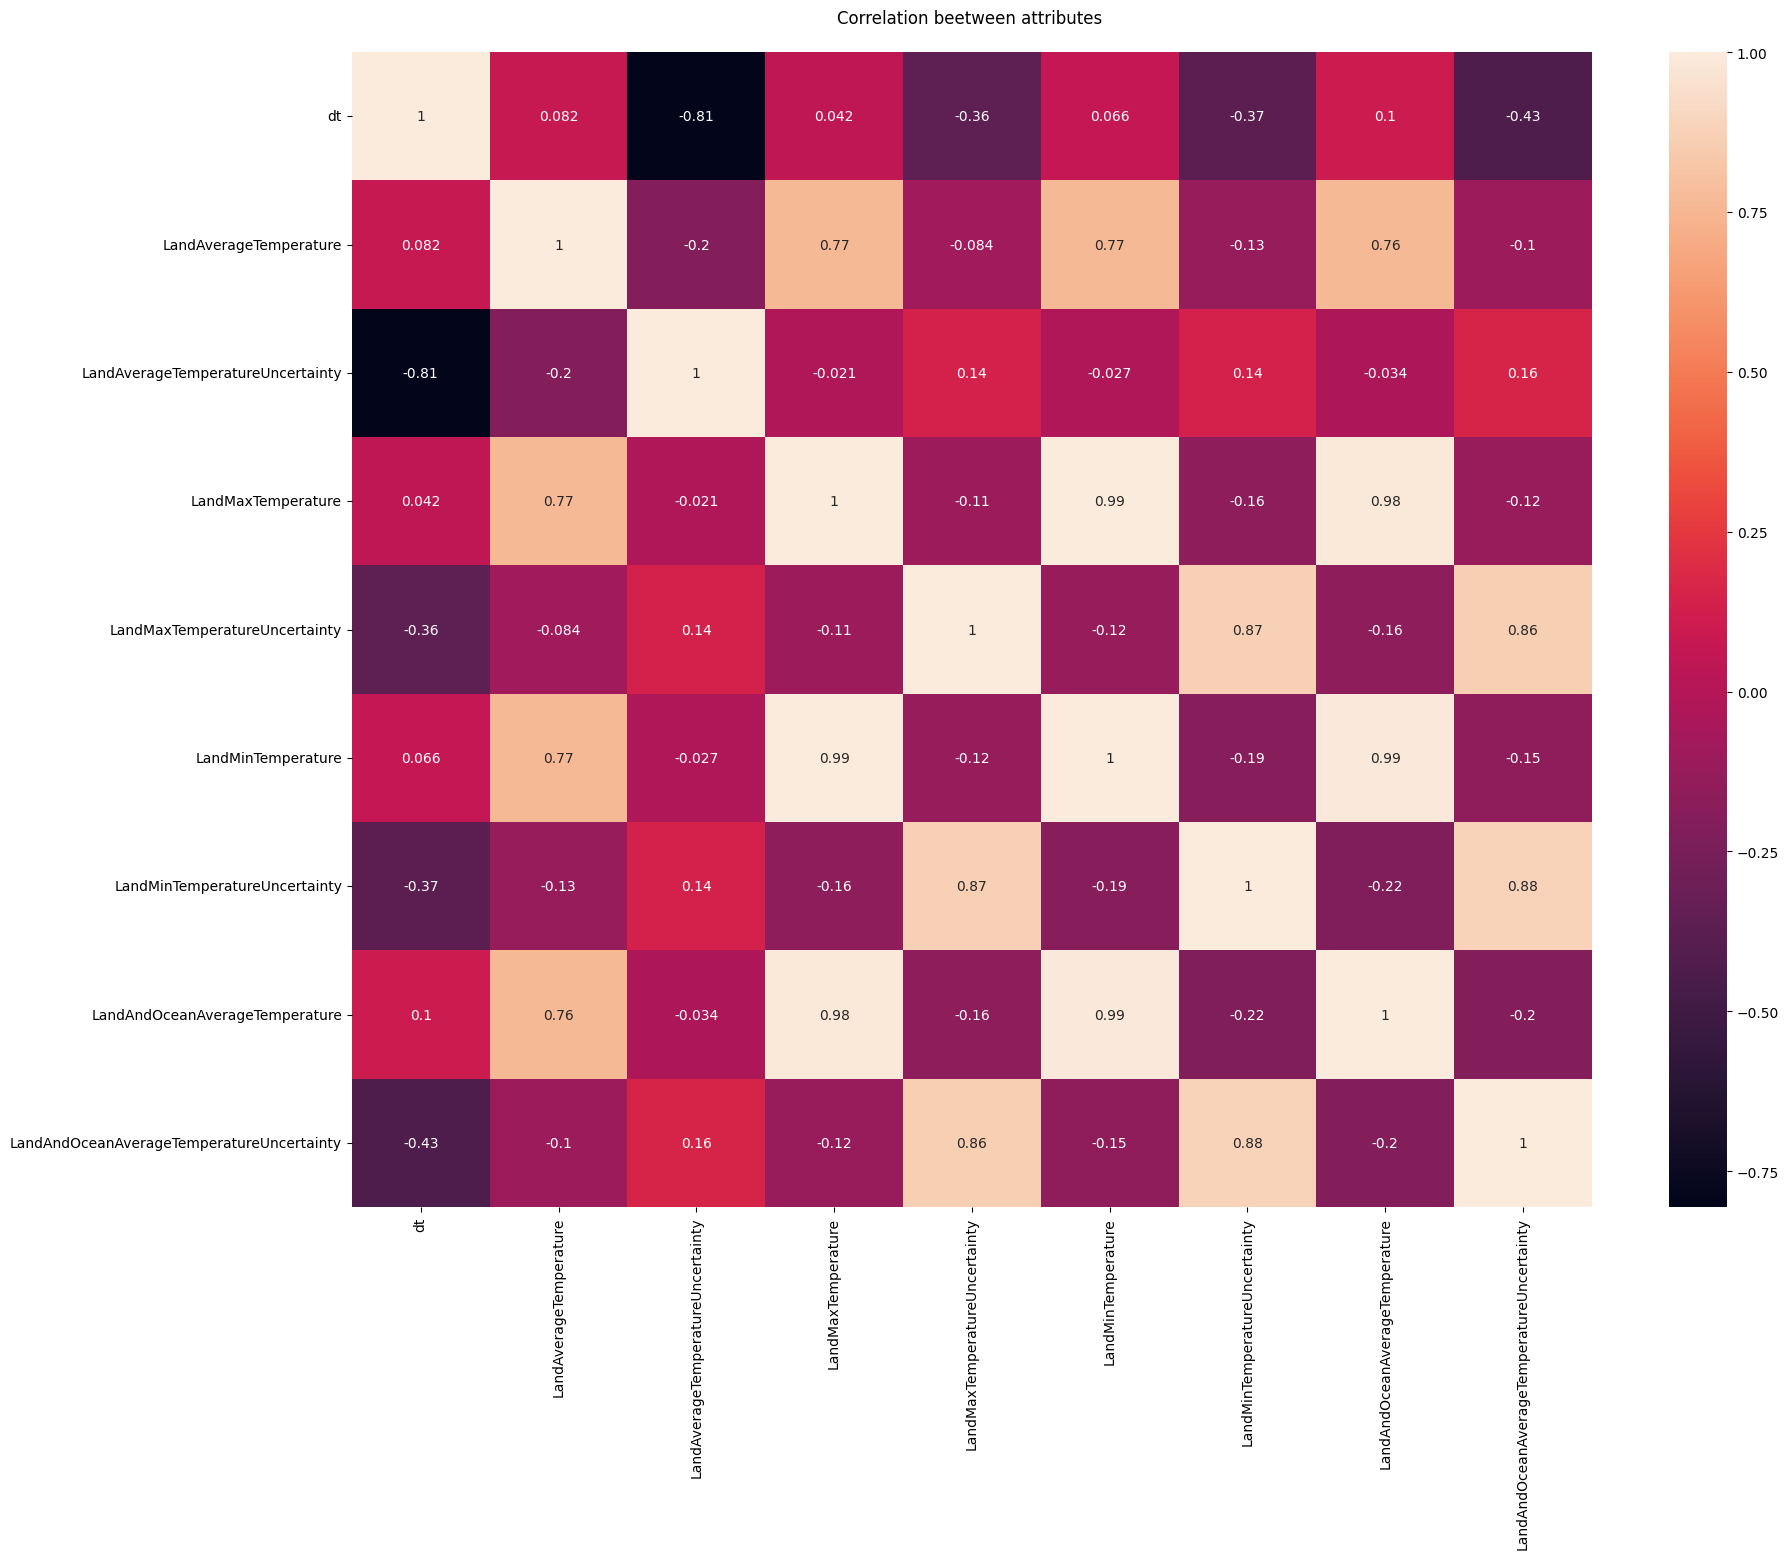

In [40]:
#correlation matrix
plt.figure(figsize=(20,15))
corelation=global_temp.corr()
sns.heatmap(corelation,annot=True,linecolor="white")
plt.title('Correlation beetween attributes \n')
plt.show()

In [41]:
temp_by_country['dt'] = pd.to_datetime(temp_by_state['dt'])
temp_by_country.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
dtype: object

In [44]:
#For obtain correlation matrix, we should convert string values in numeric values in temperature by state dataset
#we replace others non numeric values columns by numeric values
le=LabelEncoder()
for i in temp_by_country:
    temp_by_country[i]=le.fit_transform(temp_by_country[i])
temp_by_country

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1338,33063,25139,242
1,1339,31977,28213,242
2,1340,30876,30533,242
3,1341,29692,32111,242
4,1342,28606,33224,242
...,...,...,...,...
577457,1483,59481,4947,241
577458,1484,56437,419,241
577459,1485,55315,399,241
577460,1486,61021,852,241


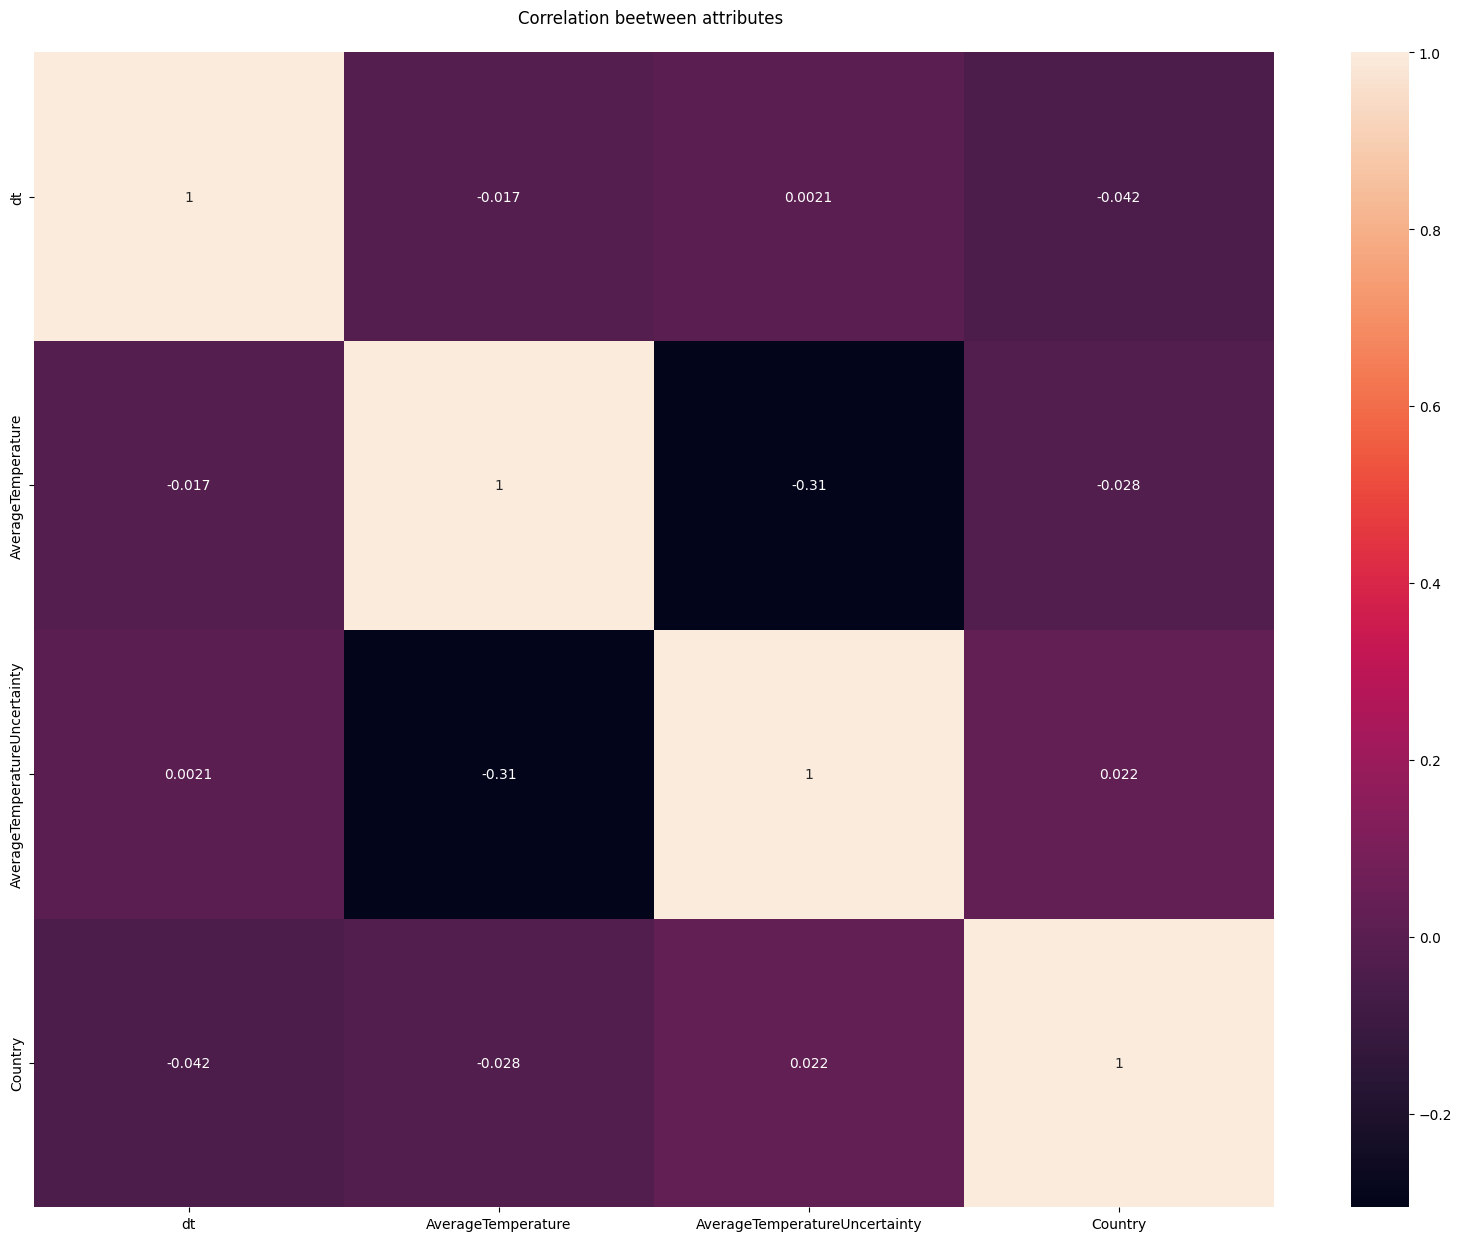

In [45]:
#correlation matrix
plt.figure(figsize=(20,15))
corelation=temp_by_country.corr()
sns.heatmap(corelation,annot=True,linecolor="white")
plt.title('Correlation beetween attributes \n')
plt.show()